<a href="https://colab.research.google.com/github/LucilleKaleha/W6_IP_Football_Predictions/blob/master/Week6_IP_Football_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The Question

        Predict the result of a game between team 1 and team 2, based on who's home and who's away,

        and on whether or not the game is friendly

### Metric of Success

 Predicting, with an accuracy of 70% or an RMSE of 10% of the target variable mean
 
         1: how many goals the home team scores

         2: how many goals the away team scores

### The Context

My context will be in the form of the Project Overview

        You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

          A Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the 
          game is friendly (include rank in your training).

          You have two possible approaches (as  shown below) given the datasets that will be provided

          Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

          Approach 1: Polynomial approach

          What to train given:

          Rank of home team
          Rank of away team
          Tournament type
          Model 1: Predict how many goals the home team scores

          Model 2: Predict how many goals the away team scores

 

          Approach 2 Logistic approach

          Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### Experimental Design

The expected flow for the assessment will be as follows:

    - Perform your EDA
    - Perform any necessary feature engineering
    - Check of multicollinearity
    - Start building the model
    - Cross-validate the model
    - Compute RMSE
    - Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
    - Perform appropriate regressions on the data including your justification
    
        NB: The assessment might not discretely follow the flow as outlined

### The Data

The dataset and glossary used for this project can be found here  :

https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc



## Importing Libraries

In [0]:
# Importing the necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

# We will import the libraries necessary for regression as we move along

## Loading Datasets

In [0]:
# Creating a dataframe 'ranking' form the fifa ranking dataset
ranking = pd.read_csv('fifa_ranking.csv')
# 
# Creating a dataframe 'results' from the results dataset
results = pd.read_csv('results.csv')

## Preview of the Datasets

Because we have two datasets, whatever action we carry out on our first dataset(Fifa Ranking), we will also carry out on the second dataset(results)

In [282]:
# Getting a preview of the irst 10 rows of the Fifa ranking dataset

ranking.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
6,7,Russia,RUS,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.0,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
9,10,Denmark,DEN,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [283]:
# Checking for null values in the ranking dataset

ranking.isnull().any()

rank                       False
country_full               False
country_abrv               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
dtype: bool

In [284]:
# Let's look at the datatypes
# 
ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [285]:
# Getting a preview of the first 10 rows of the results dataset
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [286]:
#  Checking for null values in the dataset
# 
results.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [287]:
# Checking the datatypes
# 
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## Exploratory Data Analysis & Feature Engineering

We will use Pandas Profiling to get an overview of both our dataframes

and their statistical summaries

In [288]:
# Getting an overview of the results dataframe
pp.ProfileReport(results)

Number of variables,9
Number of observations,40839
Total Missing (%),0.0%
Total size in memory,2.5 MiB
Average record size in memory,65.0 B
Numeric,2
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [289]:
# Getting an overview of the ranking dataframe
pp.ProfileReport(ranking)

Number of variables,16
Number of observations,57793
Total Missing (%),0.0%
Total size in memory,7.1 MiB
Average record size in memory,128.0 B
Numeric,4
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,8


In [0]:
# Converting the date data type in the results dataframe from object to datetime
# 
results.date = pd.to_datetime(results.date)

In [0]:
# Let's convert the date column dtype in the ranking dataframe from object to datetime
# 
ranking.rank_date = pd.to_datetime(ranking.rank_date)

In [0]:
# We'll first separate the date columns in both datasets into year and month
# to enable us to merge the datasets
# 
ranking['year'] = ranking.rank_date.dt.year          
ranking['month'] = ranking.rank_date.dt.month
# 
results['year'] = results.date.dt.year
results['month'] = results.date.dt.month

In [0]:
# Creating an Outcome column in the results dataframe
# In order to do this, we will first need to get the difference between the home
# score and the away score (we'll call this column 'score_diff')

results['score_diff'] = results.home_score - results.away_score

# We can now create the outcome column by comparing the home_score and away_score

outcome = []
for i in range(len(results.home_team)):
  if results.home_score[i] > results.away_score[i]:
    outcome.append('2')                                     # a 2 will represent a win
  elif results.home_score[i] < results.away_score[i]:
    outcome.append('1')                                     # this will represent a loss
  else:
    outcome.append('0')                                     # and this 0 will represent a draw
  
results['outcome'] = outcome

In [294]:
# Let's preview our dataframe to the see changes

results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,score_diff,outcome
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,2,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,1,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,0,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,2
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1876,3,4,2
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,1877,3,-2,1
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,1877,3,-2,1
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1878,3,5,2
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,1878,3,9,2


In [0]:
# In order to have uniormity in our two datasets, we'll select data from the 
# results dataframe within a similar "time frame" to the ranking dataframe

results = results[results.date >= '1993-08-08']
results = results[results.date <= '2018-06-07']

In [0]:
# Dropping the columns that are unnecessary for our analysis in the ranking dataframe
# 
ranking = ranking.drop(['cur_year_avg',	'cur_year_avg_weighted',	'last_year_avg',
              'last_year_avg_weighted',	'two_year_ago_avg',	'two_year_ago_weighted',
              'three_year_ago_avg',	'three_year_ago_weighted', 'confederation'], axis = 1)

In [297]:
# We can now merge the two dataframes
# First, we rename the country column to home team and get results for home team
# 
ranking_home = ranking.copy(3)
ranking_home = ranking_home.rename({'country_full': 'home_team'}, axis =1)   
# We then merge on home_team, year and month
# 
merged_home = pd.merge(results, ranking_home, how = 'left', on = ['home_team', 'year', 'month'])
merged_home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,score_diff,outcome,rank,country_abrv,total_points,previous_points,rank_change,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,8,2,2,59.0,BOL,0.0,13.0,28.0,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,8,0,0,8.0,BRA,0.0,55.0,-5.0,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,8,5,2,35.0,ECU,0.0,23.0,30.0,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,8,1,2,65.0,GUI,0.0,23.0,-2.0,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8,-2,1,67.0,PAR,0.0,22.0,1.0,1993-08-08


In [298]:
# Renaming the columns
merged_home = merged_home.rename({'rank': 'home_team_rank', 'rank_change': 'home_team_rank_change', 'total_points': 'home_team_total_points', 'previous_points': 'home_team_previous_points'}, axis=1)
merged_home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,score_diff,outcome,home_team_rank,country_abrv,home_team_total_points,home_team_previous_points,home_team_rank_change,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,8,2,2,59.0,BOL,0.0,13.0,28.0,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,8,0,0,8.0,BRA,0.0,55.0,-5.0,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,8,5,2,35.0,ECU,0.0,23.0,30.0,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,8,1,2,65.0,GUI,0.0,23.0,-2.0,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8,-2,1,67.0,PAR,0.0,22.0,1.0,1993-08-08


In [299]:
# Now, we rename the country column to away team and get results for away team
# 
ranking_away = ranking.copy()
ranking_away = ranking_away.rename({'country_full': 'away_team'}, axis =1)   
# We then merge on away_team, year and month
# 
merged = pd.merge(merged_home, ranking_away, how = 'left', on = ['away_team', 'year', 'month'])
merged.head()
# ranking_away.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,score_diff,outcome,home_team_rank,country_abrv_x,home_team_total_points,home_team_previous_points,home_team_rank_change,rank_date_x,rank,country_abrv_y,total_points,previous_points,rank_change,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,8,2,2,59.0,BOL,0.0,13.0,28.0,1993-08-08,22.0,URU,0.0,47.0,-6.0,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,8,0,0,8.0,BRA,0.0,55.0,-5.0,1993-08-08,14.0,MEX,0.0,42.0,11.0,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,8,5,2,35.0,ECU,0.0,23.0,30.0,1993-08-08,94.0,VEN,0.0,4.0,31.0,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,8,1,2,65.0,GUI,0.0,23.0,-2.0,1993-08-08,86.0,SLE,0.0,16.0,-7.0,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8,-2,1,67.0,PAR,0.0,22.0,1.0,1993-08-08,5.0,ARG,0.0,51.0,5.0,1993-08-08


In [300]:
# Renaming the away team columns
merged = merged.rename({'rank': 'away_team_rank', 'rank_change': 'away_team_rank_change', 
                        'total_points': 'away_team_total_points', 'previous_points': 'away_team_previous_points'}, 
                       axis=1)
merged.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,score_diff,outcome,home_team_rank,country_abrv_x,home_team_total_points,home_team_previous_points,home_team_rank_change,rank_date_x,away_team_rank,country_abrv_y,away_team_total_points,away_team_previous_points,away_team_rank_change,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,8,2,2,59.0,BOL,0.0,13.0,28.0,1993-08-08,22.0,URU,0.0,47.0,-6.0,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,8,0,0,8.0,BRA,0.0,55.0,-5.0,1993-08-08,14.0,MEX,0.0,42.0,11.0,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,8,5,2,35.0,ECU,0.0,23.0,30.0,1993-08-08,94.0,VEN,0.0,4.0,31.0,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,8,1,2,65.0,GUI,0.0,23.0,-2.0,1993-08-08,86.0,SLE,0.0,16.0,-7.0,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8,-2,1,67.0,PAR,0.0,22.0,1.0,1993-08-08,5.0,ARG,0.0,51.0,5.0,1993-08-08


In [301]:
# Creating a final dataframe with the variables we'll work with for analysis
# 
mchezo = merged.drop(['city', 'country', 'year', 'month', 'country_abrv_x', 
'rank_date_x', 'rank_date_y', 'country_abrv_y'], axis = 1)
mchezo.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,score_diff,outcome,home_team_rank,home_team_total_points,home_team_previous_points,home_team_rank_change,away_team_rank,away_team_total_points,away_team_previous_points,away_team_rank_change
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,2,2,59.0,0.0,13.0,28.0,22.0,0.0,47.0,-6.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,0,0,8.0,0.0,55.0,-5.0,14.0,0.0,42.0,11.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,5,2,35.0,0.0,23.0,30.0,94.0,0.0,4.0,31.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1,2,65.0,0.0,23.0,-2.0,86.0,0.0,16.0,-7.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,-2,1,67.0,0.0,22.0,1.0,5.0,0.0,51.0,5.0


In [302]:
# Converting the variables in the neutral column to a dummy indicators
# 

from sklearn.preprocessing import LabelEncoder
# 
enc = LabelEncoder()
mchezo.neutral = enc.fit_transform(mchezo.neutral)
mchezo.neutral.unique()
mchezo.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,score_diff,outcome,home_team_rank,home_team_total_points,home_team_previous_points,home_team_rank_change,away_team_rank,away_team_total_points,away_team_previous_points,away_team_rank_change
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,0,2,2,59.0,0.0,13.0,28.0,22.0,0.0,47.0,-6.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,0,0,0,8.0,0.0,55.0,-5.0,14.0,0.0,42.0,11.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,0,5,2,35.0,0.0,23.0,30.0,94.0,0.0,4.0,31.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,0,1,2,65.0,0.0,23.0,-2.0,86.0,0.0,16.0,-7.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,0,-2,1,67.0,0.0,22.0,1.0,5.0,0.0,51.0,5.0


In [303]:
# # Checking for null values in the merged dataframe
mchezo.isnull().sum()

date                            0
home_team                       0
away_team                       0
home_score                      0
away_score                      0
tournament                      0
neutral                         0
score_diff                      0
outcome                         0
home_team_rank               3454
home_team_total_points       3454
home_team_previous_points    3454
home_team_rank_change        3454
away_team_rank               3545
away_team_total_points       3545
away_team_previous_points    3545
away_team_rank_change        3545
dtype: int64

In [0]:
# # Dropping the null values observed
mchezo = mchezo.dropna()

In [305]:
# # Lets check the size of our final datarame
mchezo.shape

(16890, 17)

In [306]:
# 
mchezo.tournament.unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament',
       'CFU Caribbean Cup qualification', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'FIFA World Cup', 'Oceania Nations Cup qualification',
       'Baltic Cup', 'Gulf Cup', 'Simba Tournament', 'CECAFA Cup',
       'Dynasty Cup', "King's Cup", 'SAFF Cup', 'Copa Paz del Chaco',
       'Korea Cup', 'USA Cup', 'Copa América', 'Merdeka Tournament',
       'South Pacific Games', 'UNCAF Cup', 'Oceania Nations Cup',
       'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Confederations Cup',

In [0]:
# For our analysis, in order to ake predictions, we will only consider whether the
# tournament is a friendly or not.
# We will therefore apply a function game_type that will return 0 if the game is a 
# friendly and 1 if the game is not a friendly
# 
game_type = []
for i in mchezo.tournament:
  if i == 'Friendly':
    game_type.append('0')                                     
  else:
    game_type.append('1')                                     
  
mchezo['game_type']  = game_type

In [308]:
# It doesn't look like the date is necessary here
# we can also drop the tournament column because the information on it is being 
# captured in the new game_type column
# 
mchezo = mchezo.drop(['tournament', 'date'], axis = 1)
mchezo.head()

,home_team,away_team,home_score,away_score,neutral,score_diff,outcome,home_team_rank,home_team_total_points,home_team_previous_points,home_team_rank_change,away_team_rank,away_team_total_points,away_team_previous_points,away_team_rank_change,game_type
0,Bolivia,Uruguay,3,1,0,2,2,59.0,0.0,13.0,28.0,22.0,0.0,47.0,-6.0,1
1,Brazil,Mexico,1,1,0,0,0,8.0,0.0,55.0,-5.0,14.0,0.0,42.0,11.0,0
2,Ecuador,Venezuela,5,0,0,5,2,35.0,0.0,23.0,30.0,94.0,0.0,4.0,31.0,1
3,Guinea,Sierra Leone,1,0,0,1,2,65.0,0.0,23.0,-2.0,86.0,0.0,16.0,-7.0,0
4,Paraguay,Argentina,1,3,0,-2,1,67.0,0.0,22.0,1.0,5.0,0.0,51.0,5.0,1


In [0]:
# final_mchezo = pd.get_dummies(mchezo, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
# In order to predict the performance of a team, we will rely more on the team's rank than the team name
# because of this reason, we will drop the home team and away team columns

final_mchezo = mchezo.drop(['home_team', 'away_team'], axis = 1)

In [310]:
# Now we can preview our final dataset
final_mchezo.head()

,home_score,away_score,neutral,score_diff,outcome,home_team_rank,home_team_total_points,home_team_previous_points,home_team_rank_change,away_team_rank,away_team_total_points,away_team_previous_points,away_team_rank_change,game_type
0,3,1,0,2,2,59.0,0.0,13.0,28.0,22.0,0.0,47.0,-6.0,1
1,1,1,0,0,0,8.0,0.0,55.0,-5.0,14.0,0.0,42.0,11.0,0
2,5,0,0,5,2,35.0,0.0,23.0,30.0,94.0,0.0,4.0,31.0,1
3,1,0,0,1,2,65.0,0.0,23.0,-2.0,86.0,0.0,16.0,-7.0,0
4,1,3,0,-2,1,67.0,0.0,22.0,1.0,5.0,0.0,51.0,5.0,1


## Polynomial Regression Approach

Before we build our models, we'll first check for multicollinearity in our dataset

In [311]:
# In order to check for multicollinearity, we need to focus on the independent variables only
# We therefore drop our target variables, home score and away score

independent_only = final_mchezo.drop(columns=['home_score', 'away_score'])

# In order to display the correlations between the variables
correlations = independent_only.corr()

correlations
# 

,neutral,score_diff,home_team_rank,home_team_total_points,home_team_previous_points,home_team_rank_change,away_team_rank,away_team_total_points,away_team_previous_points,away_team_rank_change
neutral,1.000000,-0.087189,0.042665,0.025766,-0.010275,0.020036,0.052771,0.016867,-0.032181,0.053891
score_diff,-0.087189,1.000000,-0.226433,0.057784,0.138040,0.113767,0.336787,-0.116489,-0.238405,-0.113036
home_team_rank,0.042665,-0.226433,1.000000,-0.283112,-0.662370,-0.001527,0.467934,-0.116743,-0.293816,0.047204
home_team_total_points,0.025766,0.057784,-0.283112,1.000000,0.515797,-0.042251,-0.112829,0.794827,0.309230,-0.064067
home_team_previous_points,-0.010275,0.138040,-0.662370,0.515797,1.000000,-0.112318,-0.290068,0.322194,0.601588,-0.073806
home_team_rank_change,0.020036,0.113767,-0.001527,-0.042251,-0.112318,1.000000,0.044767,-0.061061,-0.064128,0.034581
away_team_rank,0.052771,0.336787,0.467934,-0.112829,-0.290068,0.044767,1.000000,-0.280907,-0.666422,-0.018729
away_team_total_points,0.016867,-0.116489,-0.116743,0.794827,0.322194,-0.061061,-0.280907,1.000000,0.501833,-0.029694
away_team_previous_points,-0.032181,-0.238405,-0.293816,0.309230,0.601588,-0.064128,-0.666422,0.501833,1.000000,-0.096974
away_team_rank_change,0.053891,-0.113036,0.047204,-0.064067,-0.073806,0.034581,-0.018729,-0.029694,-0.096974,1.000000


In [312]:
# Let's use these correlations to compute the VIF score for each variable
# In order to do this, we create a dataframe with the inverse of the correlation matrix
# 
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,neutral,score_diff,home_team_rank,home_team_total_points,home_team_previous_points,home_team_rank_change,away_team_rank,away_team_total_points,away_team_previous_points,away_team_rank_change
neutral,1.021489,0.138229,0.009153,-0.017192,-0.046978,-0.035073,-0.097899,-0.023356,0.042285,-0.041639
score_diff,0.138229,1.483614,0.739735,0.015788,0.031092,-0.133218,-0.834960,-0.005435,0.001056,0.117550
home_team_rank,0.009153,0.739735,3.808268,-0.506164,3.323628,0.261488,-2.745635,0.393920,-2.575697,-0.182311
home_team_total_points,-0.017192,0.015788,-0.506164,5.057020,-2.968320,-0.249815,0.439191,-4.269333,2.521379,0.266112
home_team_previous_points,-0.046978,0.031092,3.323628,-2.968320,6.050113,0.533417,-2.633505,2.456997,-4.726883,-0.347676
home_team_rank_change,-0.035073,-0.133218,0.261488,-0.249815,0.533417,1.066764,-0.186418,0.246843,-0.386452,-0.072674
away_team_rank,-0.097899,-0.834960,-2.745635,0.439191,-2.633505,-0.186418,3.953662,-0.480258,3.328952,0.263325
away_team_total_points,-0.023356,-0.005435,0.393920,-4.269333,2.456997,0.246843,-0.480258,4.955343,-2.860189,-0.257884
away_team_previous_points,0.042285,0.001056,-2.575697,2.521379,-4.726883,-0.386452,3.328952,-2.860189,5.986643,0.503419
away_team_rank_change,-0.041639,0.117550,-0.182311,0.266112,-0.347676,-0.072674,0.263325,-0.257884,0.503419,1.064132


The 'away team previous points' has a score of 5.98 which is a bit problematic

In [313]:
# Let's remove this away team previous points column and see i we can get improved VIF scores
# 
revised = independent_only.drop(columns=['away_team_previous_points'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,neutral,score_diff,home_team_rank,home_team_total_points,home_team_previous_points,home_team_rank_change,away_team_rank,away_team_total_points,away_team_rank_change
neutral,1.021191,0.138221,0.027346,-0.035002,-0.013591,-0.032344,-0.121412,-0.003154,-0.045195
score_diff,0.138221,1.483613,0.740190,0.015343,0.031926,-0.133150,-0.835548,-0.004930,0.117461
home_team_rank,0.027346,0.740190,2.700098,0.578636,1.289931,0.095221,-1.313384,-0.836650,0.034280
home_team_total_points,-0.035002,0.015343,0.578636,3.995098,-0.977511,-0.087054,-0.962855,-3.064715,0.054089
home_team_previous_points,-0.013591,0.031926,1.289931,-0.977511,2.317901,0.228286,-0.005059,0.198673,0.049810
home_team_rank_change,-0.032344,-0.133150,0.095221,-0.087054,0.228286,1.041817,0.028473,0.062211,-0.040177
away_team_rank,-0.121412,-0.835548,-1.313384,-0.962855,-0.005059,0.028473,2.102554,1.110188,-0.016608
away_team_total_points,-0.003154,-0.004930,-0.836650,-3.064715,0.198673,0.062211,1.110188,3.588854,-0.017370
away_team_rank_change,-0.045195,0.117461,0.034280,0.054089,0.049810,-0.040177,-0.016608,-0.017370,1.021799


From above, we can notice a significant improvement in the VIF scores after dropping the column, especially the away

team total points! This means that the two columns were colinear

### Model 1: Predicting home team scores given the rank

In [314]:
# Let us get the mean of our target variable home team score, which
# which we will use to compare to out RMSE to assess the accuracy of our model
# 
mchezo.home_score.mean()

1.6034931912374186

In [315]:
# Importing the necessary libraries for regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# 
# Polynomial regression works with one independent variable in order to 
# predict our target variable
# In this case, our X will be the home team rank and y is the home scores
# 
X = mchezo.home_team_rank.values
y = mchezo.home_score.values
# 
print(X)
print(y)

[59.  8. 35. ...  4. 22. 97.]
[3 1 5 ... 3 2 1]


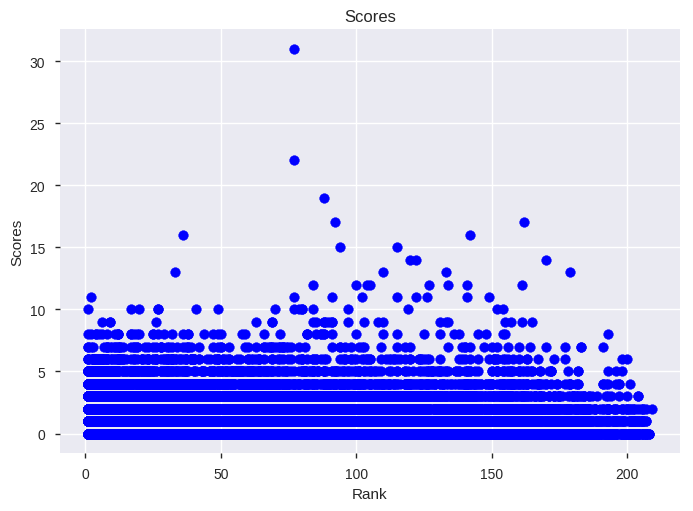

In [316]:
# We can first visualize these variables with a scatter plot
# 
plt.scatter(X, y, color = 'blue')
plt.title('Scores')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.show()

In [317]:
# Let's apply polynomial regression
#
a = mchezo.home_team_rank.values.reshape(-1,1)
b = mchezo.home_score.values

# We first split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.2, random_state=0)
# 
# We then fit Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(a)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, b)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

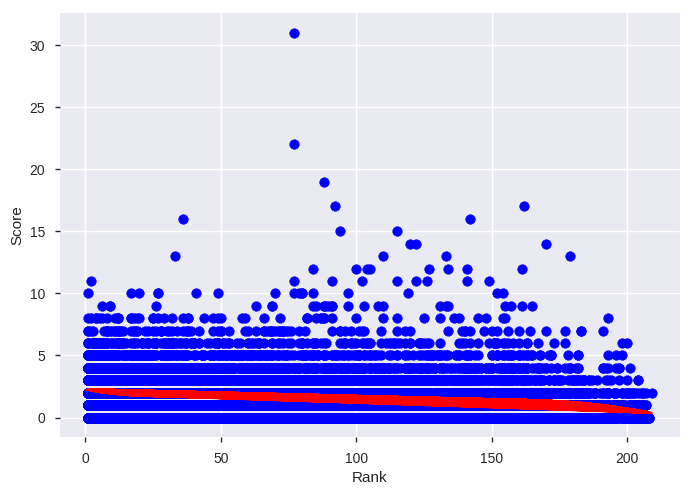

In [318]:
# Visualize the Polynomial Regression results

plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.show()

In [319]:
# running the prediction
# we'll assign the prediction y_pred and then call it, to see the array

y_pred = pol_reg.predict(X_poly)
y_pred

array([1.65942171, 1.99946199, 1.71359655, ..., 2.1299172 , 1.769372  ,
       1.46305301])

In [320]:
# measuring the accuracy of our model using RMSE
# RMSE is the square root of the mean squared error(mse) , we therefore need to import mse
# from the metrics library first and use it to calculate the rmse for the model

from sklearn.metrics import mean_squared_error
# 
rmse = np.sqrt(mean_squared_error(y, y_pred))
# 
print(rmse)

1.5971473922335817


### Checking for Heteroscedasticity in Model 1

Heteroscedasticity describe the case where the variance of errors or the model is not the same for all observations, 

while often one of the basic assumption in modeling is that the variances are homogeneous 

and that the errors of the model are identically distributed

In [0]:
# Creating a variable residual, this will be a diference between the 
# predicted values and the actual values i.e the error

residual = np.subtract(y_pred, y_test)
pd.DataFrame(residual).describe()       #We then create a dataframe usin the variable

In [0]:
# Showing a residual plot of the above
# 
plt.scatter(y_pred, residual, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residual.mean(), color='blue', linewidth=1)
plt.show()

### Using the bartlett's test. 

This test establishes a null hypothesis that the variance is equal for all our datapoints,

and the new hypothesis that the variance is different for at least one pair of datapoints

In [323]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residual)

# To interpret the results we must also compute a critical value of the chi squared distribution
# -
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


### Model 2 : Predicting away team scores given the rank

In [324]:
# Let us get the mean of our target variable home team score, which
# which we will use to compare to out RMSE to assess the accuracy of our model
# 
mchezo.away_score.mean()

1.067199526346951

[ 22.  14.  94. ...  66.  47. 120.]
[1 1 0 ... 0 2 2]


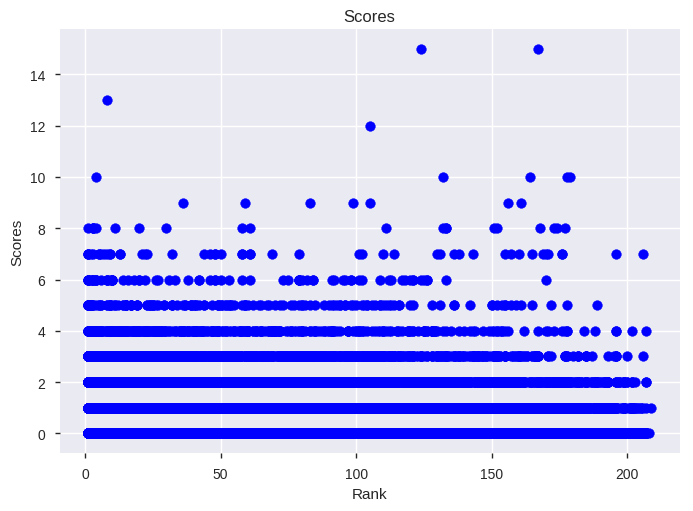

In [325]:
# We are going to repeat the same steps that we carried out in model 1

X = mchezo.away_team_rank.values
y = mchezo.away_score.values
# 
print(X)
print(y)
# 
# visualize these variables with a scatter plot
# 
plt.scatter(X, y, color = 'blue')
plt.title('Scores')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.show()

In [326]:
c.shape

(16890, 1)

In [327]:
# Let's apply polynomial regression
# assigning v
c = mchezo.home_team_rank.values.reshape(-1,1)
d = mchezo.home_score.values

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(c, d, test_size = 0.25, random_state = 101)

# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.586702894817631


### Checking for Heteroscedasticity for Model 2

We will repeat the same steps we carried out when checking for heteroscedasticity in Model 

1 above

In [328]:
# 
residual = np.subtract(y_pred, y_test)               
pd.DataFrame(residual).describe()

,0
count,4223.000000
mean,0.027675
std,1.586649
min,-29.392673
25%,-0.566075
50%,0.438154
75%,1.123068
max,1.928757


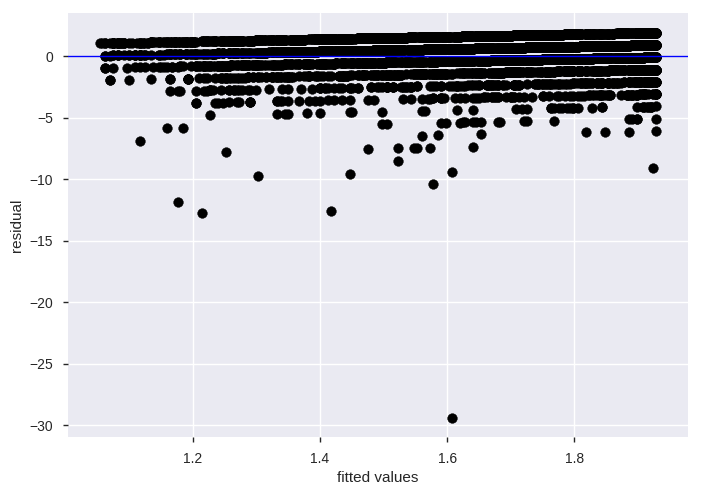

In [329]:
# Showing a residual plot of the above
# 
plt.scatter(y_pred, residual, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residual.mean(), color='blue', linewidth=1)
plt.show()

In [330]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residual)

# To interpret the results we must also compute a critical value of the chi squared distribution
# -
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## Logistic Regression Approach

For our logistic regression, we have been asked to figure out from the

home team’s perspective if the game is a Win, Lose or Draw (In the case of our

dataset 2, 1, 0, respectively)

In [331]:
# In order to avoid a case o overfitting in our model, we are going to drop some
# columns, that is, the home_score, awaay_score, score_difference
# We will also drop the away_team_previous_points column which presented colinearity 
# with away team points

logistic_mchezo = final_mchezo.drop(['home_score',	'away_score', 'score_diff', 'away_team_previous_points'], axis = 1)
logistic_mchezo.head()

,neutral,outcome,home_team_rank,home_team_total_points,home_team_previous_points,home_team_rank_change,away_team_rank,away_team_total_points,away_team_rank_change,game_type
0,0,2,59.0,0.0,13.0,28.0,22.0,0.0,-6.0,1
1,0,0,8.0,0.0,55.0,-5.0,14.0,0.0,11.0,0
2,0,2,35.0,0.0,23.0,30.0,94.0,0.0,31.0,1
3,0,2,65.0,0.0,23.0,-2.0,86.0,0.0,-7.0,0
4,0,1,67.0,0.0,22.0,1.0,5.0,0.0,5.0,1


In [0]:
# Let's first split our dataframe 

X = logistic_mchezo.drop("outcome",axis=1)
y = logistic_mchezo["outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [333]:
y_pred

array(['1', '2', '2', ..., '2', '2', '2'], dtype=object)

In [334]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[   0,  257,  586],
       [   0,  606,  366],
       [   0,  187, 1376]])

From the above confusion matrix, we can observe the values that were able to be pedicted correctly 

on the diagonal, and those on the off-diagonal that our model was not able to predict correctly

In [335]:
print(accuracy_score(y_test, y_pred))

0.5867377146240379


In [336]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## K-Fold Cross Validation

We are going to use a 5-fold cross validation to validate our model

In [337]:
from sklearn import metrics

# We will use our logistic_mchezo dataframe
X = logistic_mchezo.drop("outcome",axis=1)
y = logistic_mchezo["outcome"]

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.64160424517212
Mean Squared Error: 0.5942925720714215
Root Mean Squared Error: 0.7709037372275617


In [338]:
# 
X = logistic_mchezo.drop("outcome",axis=1).values
y = logistic_mchezo["outcome"].values

from sklearn.model_selection import KFold

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # Fitting our model
  # 
  from sklearn.linear_model import LogisticRegression

  LogReg = LogisticRegression()
  LogReg.fit(X_train, y_train)

  # Using our model to make a prediction
  #
  y_pred = LogReg.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.9644356770939305

Training model 2
Model 2 Root Mean Squared Error: 0.9427043722460114

Training model 3
Model 3 Root Mean Squared Error: 0.9135192750873882

Training model 4
Model 4 Root Mean Squared Error: 0.9463087741499366

Training model 5
Model 5 Root Mean Squared Error: 0.9565764393451486


 The RMSE value for our first model and the recurrent ones, is fairly larger than the RMSE of 0.7709 
 
 that we found initially. 

## Challenging the Solution

None of the models recommended for the project yielded very desirable accuracy results for prediction.

The models therefore cannot be used to accurately(or close to accurately) predict the number of goals. The Polynomial regression approach employed to predict the number of goals scored by home and away team had RMSE scores of more than 90% of the mean of the target variable and should hence be disregarded. 

In order to improve our prediction accuracy we could;

    - Employ a different model/algorithm to make the predictions for home score, away score or whether the game is a win, loss 
      or draw
    - Get more variables that would also help to determine whether a team wins or loses  